In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
gdf = gpd.read_file("../lab-4-maup-and-data-arashooska/GA.shp")

  DISTRICT CTYSOSID PRECINCT_I PRECINCT_N CTYNAME CTYNUMBER CTYNUMBER2 FIPS2  \
0  121JC15  121JC15       JC15       JC15  FULTON        60        060   121   
1  12108N1  12108N1       08N1       08N1  FULTON        60        060   121   
2  12108N2  12108N2       08N2       08N2  FULTON        60        060   121   
3  121JC14  121JC14       JC14       JC14  FULTON        60        060   121   
4  121JC05  121JC05       JC05       JC05  FULTON        60        060   121   

   G18GOVRKEM  G18GOVDABR  ...  HVAP  WVAP  BVAP  AMINVAP  ASIANVAP  NHPIVAP  \
0         193         309  ...   217   510   150        5       134        0   
1         349         224  ...    31   559    14        0        24        0   
2         399         510  ...    64  1263   389        0       112        0   
3         910         704  ...   108  1531   178        8       779        2   
4         592         763  ...   233  1445   346        2       780        4   

   OTHERVAP  2MOREVAP   CD            

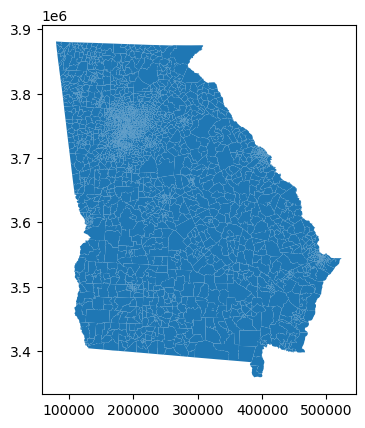

In [5]:
# View the data structure
print(gdf.head())

# Plot the data
gdf.plot()
plt.show()

In [6]:
# Print all column names that start with "G" to get the elections

election_cols = []
for column in gdf.columns:
    if column.startswith("G"):
        print(column)
        election_cols.append(column)

G18GOVRKEM
G18GOVDABR
G18GOVLMET
G18LTGRDUN
G18LTGDAMI
G18SOSRRAF
G18SOSDBAR
G18SOSLDUV
G18ATGRCAR
G18ATGDBAI
G18AGRRBLA
G18AGRDSWA
G18INSRBEC
G18INSDLAW
G18INSLFOS
G18SPIRWOO
G18SPIDTHO
G18LABRBUT
G18LABDKEA
G18PSCREAT
G18PSCDMIL
G18PSCLGRA
G18PSCRPRI
G18PSCDRAN
G18PSCLTUR


- GOV: Governor
- LTG: Lieutenant Governor
- SOS: Secretary of State
- ATG: Attorney General
- AGR: Agriculture Commissioner
- INS: Insurance Commissioner
- SPI: State Superintendent of Schools
- LAB: Labor Commissioner
- PSC: Public Service Commissioner

The additional letters represent party affiliations. For example:

- R: Republican
- D: Democrat
- L: Libertarian

In [7]:
print(gdf.columns)

Index(['DISTRICT', 'CTYSOSID', 'PRECINCT_I', 'PRECINCT_N', 'CTYNAME',
       'CTYNUMBER', 'CTYNUMBER2', 'FIPS2', 'G18GOVRKEM', 'G18GOVDABR',
       'G18GOVLMET', 'G18LTGRDUN', 'G18LTGDAMI', 'G18SOSRRAF', 'G18SOSDBAR',
       'G18SOSLDUV', 'G18ATGRCAR', 'G18ATGDBAI', 'G18AGRRBLA', 'G18AGRDSWA',
       'G18INSRBEC', 'G18INSDLAW', 'G18INSLFOS', 'G18SPIRWOO', 'G18SPIDTHO',
       'G18LABRBUT', 'G18LABDKEA', 'G18PSCREAT', 'G18PSCDMIL', 'G18PSCLGRA',
       'G18PSCRPRI', 'G18PSCDRAN', 'G18PSCLTUR', 'R18SOSRRAF', 'R18SOSDBAR',
       'R18PSCREAT', 'R18PSCDMIL', 'TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK',
       'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'VAP', 'HVAP',
       'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP',
       '2MOREVAP', 'CD', 'geometry'],
      dtype='object')


In order to clean the data:

1. Remove non-democratic/republican candidates
2. Choose which elections to keep (GOV, ATG, AGR)
3. Keep voting age population, black voting age population, and CD
4. Remove unnecessary columns

In [8]:
#Georgia should have 14 congressional districts, so let's check if that is the case 

gdf["CD"].unique()

array(['007', '006', '005', '010', '012', '014', '003', '002', '011',
       '009', '013', '004', '008', '001'], dtype=object)

In [9]:
#Make a copy of the data which we'll clean (that way we can refer to original data if needed)

clean_gdf = gdf.copy()

In [10]:
#Drop the irrelevant state-related columns
cols_to_drop = ['DISTRICT', 'CTYSOSID', 'PRECINCT_I', 'PRECINCT_N', 'CTYNAME', 'CTYNUMBER', 'CTYNUMBER2', 'FIPS2']

clean_gdf = clean_gdf.drop(cols_to_drop, axis=1)

In [11]:
#Only keep GOV, ATG, and AGR elections and only keep R and D parties. Implement this as dynamically as possible

election_cols_to_drop = []
elections_to_keep = ["GOV", "ATG", "AGR"]
parties_to_keep = ["R", "D"]

for column in election_cols:
    el_type = column[3:6]
    party = column[6]

    #DEBUG
    #print(el_type, party)

    if el_type not in elections_to_keep:
        election_cols_to_drop.append(column)
        continue

    elif party not in parties_to_keep:
        election_cols_to_drop.append(column)




In [12]:
clean_gdf = clean_gdf.drop(election_cols_to_drop, axis=1)

In [13]:
#Drop columns that start with R18

for column in clean_gdf.columns:
    if column.startswith("R18"):
        clean_gdf = clean_gdf.drop(column, axis=1)

In [14]:
clean_gdf.columns

Index(['G18GOVRKEM', 'G18GOVDABR', 'G18ATGRCAR', 'G18ATGDBAI', 'G18AGRRBLA',
       'G18AGRDSWA', 'TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN',
       'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'VAP', 'HVAP', 'WVAP',
       'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'CD',
       'geometry'],
      dtype='object')

In [15]:
#Print out two rows of the data without truncating the columns
import pandas as pd
pd.set_option('display.max_columns', None)
print(clean_gdf.head(2))

   G18GOVRKEM  G18GOVDABR  G18ATGRCAR  G18ATGDBAI  G18AGRRBLA  G18AGRDSWA  \
0         193         309         206         301         210         295   
1         349         224         385         192         397         172   

   TOTPOP  HISP  NH_WHITE  NH_BLACK  NH_AMIN  NH_ASIAN  NH_NHPI  NH_OTHER  \
0    1457   317       651       205        5       182        0        18   
1     922    51       773        16        0        35        0         7   

   NH_2MORE   VAP  HVAP  WVAP  BVAP  AMINVAP  ASIANVAP  NHPIVAP  OTHERVAP  \
0        79  1074   217   510   150        5       134        0        10   
1        40   658    31   559    14        0        24        0         7   

   2MOREVAP   CD                                           geometry  
0        48  007  MULTIPOLYGON (((200710.771 3771429.676, 200710...  
1        23  006  POLYGON ((183845.292 3749663.232, 183845.292 3...  


In [16]:
more_cols_to_drop = ["HISP", "NH_WHITE", "NH_BLACK", "NH_AMIN", "NH_ASIAN", "NH_NHPI", "NH_OTHER", "NH_2MORE", "HVAP", "WVAP", "AMINVAP", "ASIANVAP", "NHPIVAP", "OTHERVAP", "2MOREVAP"]

In [17]:
clean_gdf = clean_gdf.drop(more_cols_to_drop, axis=1)

In [18]:
clean_gdf

,G18GOVRKEM,G18GOVDABR,G18ATGRCAR,G18ATGDBAI,G18AGRRBLA,G18AGRDSWA,TOTPOP,VAP,BVAP,CD,geometry
0,193,309,206,301,210,295,1457,1074,150,007,"MULTIPOLYGON (((200710.771 3771429.676, 200710..."
1,349,224,385,192,397,172,922,658,14,006,"POLYGON ((183845.292 3749663.232, 183845.292 3..."
2,399,510,433,472,459,428,2143,1875,389,006,"POLYGON ((183845.292 3749663.232, 183845.292 3..."
3,910,704,944,658,971,620,3703,2648,178,007,"POLYGON ((201320.179 3770946.617, 201335.021 3..."
4,592,763,625,740,637,720,4042,2939,346,007,"POLYGON ((204371.170 3774424.999, 204671.836 3..."
...,...,...,...,...,...,...,...,...,...,...,...
2653,848,1627,872,1597,905,1553,7235,5343,1827,014,"MULTIPOLYGON (((163192.646 3771445.821, 163186..."
2654,1013,1484,1055,1443,1073,1396,7198,5535,1439,011,"MULTIPOLYGON (((164544.254 3775478.845, 164495..."
2655,1623,1241,1641,1226,1673,1181,8992,6538,1021,011,"POLYGON ((163910.434 3776788.184, 163793.465 3..."
2656,684,147,661,162,672,148,1612,1280,203,012,"POLYGON ((346964.952 3719992.466, 346950.193 3..."


In [19]:
#Export the cleaned data to a JSON file
clean_gdf.to_file("cleaned_data.json", driver="GeoJSON")

In [20]:
#Export the clean data as a csv as well just in case
clean_gdf.to_csv("cleaned_data.csv")